# **Librerías** 📖

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs


import warnings
warnings.filterwarnings('ignore')

# Carga del archivo Excel
df_Original = pd.read_excel("Segmentacion_CATT.xlsx", sheet_name="CATT")

# Eliminar columnas categoricas
df = df_Original.drop(columns=['negocio', 'region', 'canal'])


# **Análisis descriptivo** 📊

In [33]:
# Columnas del DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   capturas_tarjetas           144 non-null    float64
 1   aprobacion_tarjetas         141 non-null    float64
 2   tarjetas                    144 non-null    float64
 3   capturas_creditos           144 non-null    float64
 4   aprobacion_creditos         141 non-null    float64
 5   cantidad_creditos           144 non-null    float64
 6   monto_creditos              144 non-null    float64
 7   seguros                     144 non-null    float64
 8   trafico_transaccional       144 non-null    float64
 9   trafico_clientes            144 non-null    float64
 10  aprovechamiento_de_trafico  144 non-null    float64
 11  contribucion                144 non-null    float64
dtypes: float64(12)
memory usage: 13.6 KB


In [34]:
df = df.dropna()


In [36]:
df

,capturas_tarjetas,aprobacion_tarjetas,tarjetas,capturas_creditos,aprobacion_creditos,cantidad_creditos,monto_creditos,seguros,trafico_transaccional,trafico_clientes,aprovechamiento_de_trafico,contribucion
0,591.25,0.29813,163.00,168.00,0.03384,18.50,53.43834,103.50,125108.25,87108.00,0.00845,2002.20802
1,273.00,0.42289,109.00,36.50,0.01746,4.50,11.53701,75.50,143554.25,89312.75,0.00328,1535.21599
2,1292.00,0.33203,383.50,243.75,0.02835,32.75,95.94125,251.75,256355.00,176842.00,0.00833,2265.08432
3,1411.75,0.21167,269.25,648.75,0.06938,88.25,196.50499,280.75,209293.25,129557.00,0.01561,4278.34350
4,550.50,0.25549,122.25,113.00,0.01620,7.75,25.80312,75.50,74420.50,49449.25,0.01366,1552.20988
...,...,...,...,...,...,...,...,...,...,...,...,...
137,2528.00,0.23986,550.25,0.00,0.00000,0.00,0.00000,0.00,0.00,0.00,0.00000,-112.54394
138,145.25,0.21965,28.50,0.00,0.00000,0.00,0.00000,0.00,0.00,0.00,0.00000,-73.16321
141,1024.75,0.23361,214.75,312.25,0.03971,36.50,119.04254,214.50,154765.75,94460.50,0.01391,1899.78072
142,306.75,0.32983,86.25,52.25,0.01147,3.00,11.08023,50.75,193489.75,130281.25,0.00268,2002.55625


In [37]:
# Revisión medidas desriptivas para las variables numéricas
df.describe()

,capturas_tarjetas,aprobacion_tarjetas,tarjetas,capturas_creditos,aprobacion_creditos,cantidad_creditos,monto_creditos,seguros,trafico_transaccional,trafico_clientes,aprovechamiento_de_trafico,contribucion
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,565.710993,0.213927,112.017730,115.012411,0.023803,10.351064,27.883634,64.902482,59356.984043,36649.753546,0.011084,939.539116
std,562.740821,0.061780,120.051881,119.463407,0.018957,12.815796,33.656905,72.123968,54149.209598,35198.404382,0.010747,1230.696396
min,54.000000,0.074470,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-112.543940
25%,234.750000,0.179160,41.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.179400
50%,368.750000,0.208660,71.000000,92.000000,0.025850,6.000000,15.725700,43.500000,55109.000000,33123.750000,0.008780,581.073930
75%,642.500000,0.250320,138.750000,170.000000,0.035780,15.500000,39.601730,97.500000,89358.250000,54000.250000,0.016600,1094.621150
max,3532.250000,0.422890,735.750000,648.750000,0.084860,88.250000,196.504990,280.750000,256355.000000,176842.000000,0.049110,7650.703390


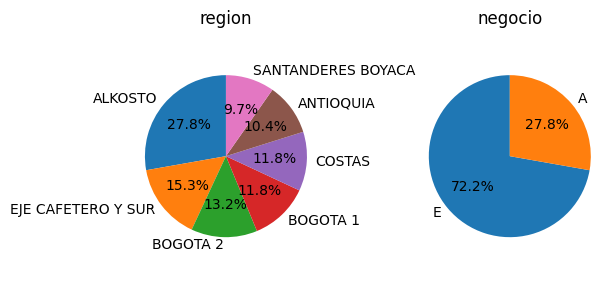

In [38]:
# Función para calcular frecuencias y frecuencias relativas
def calculate_frequencies(column):
    frequency = column.value_counts()
    relative_frequency = column.value_counts(normalize=True) * 100
    return pd.DataFrame({'Frecuencia': frequency, 'Frecuencia relativa': relative_frequency.round(2)})

# Función para generar gráficos de torta (pie chart) en subplots
def plot_pie_chart_subplot(data, title, ax):
    ax.pie(data['Frecuencia'], labels=data.index, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    ax.set_title(title)


# Crear tablas de frecuencia para las variables categóricas (No se toma en cuenta el canal)
region = calculate_frequencies(df_Original['region'])
negocio = calculate_frequencies(df_Original['negocio'])


# Variables categóricas para graficar
categorical_data = [
    (region, 'region'),
    (negocio, 'negocio'),

]
# Definir el número de columnas para los subplots
n_cols = 3
n_rows = (len(categorical_data) + n_cols - 1) // n_cols  # Calcular el número de filas necesario
# Crear los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(9, 3 * n_rows))
axes = axes.flatten()

# Graficar cada gráfico de torta en su subplot correspondiente
for i, (data_category, title) in enumerate(categorical_data):
    plot_pie_chart_subplot(data_category, title, axes[i])

# Eliminar los subplots vacíos si no se usan todos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos

<Figure size 1500x1000 with 0 Axes>

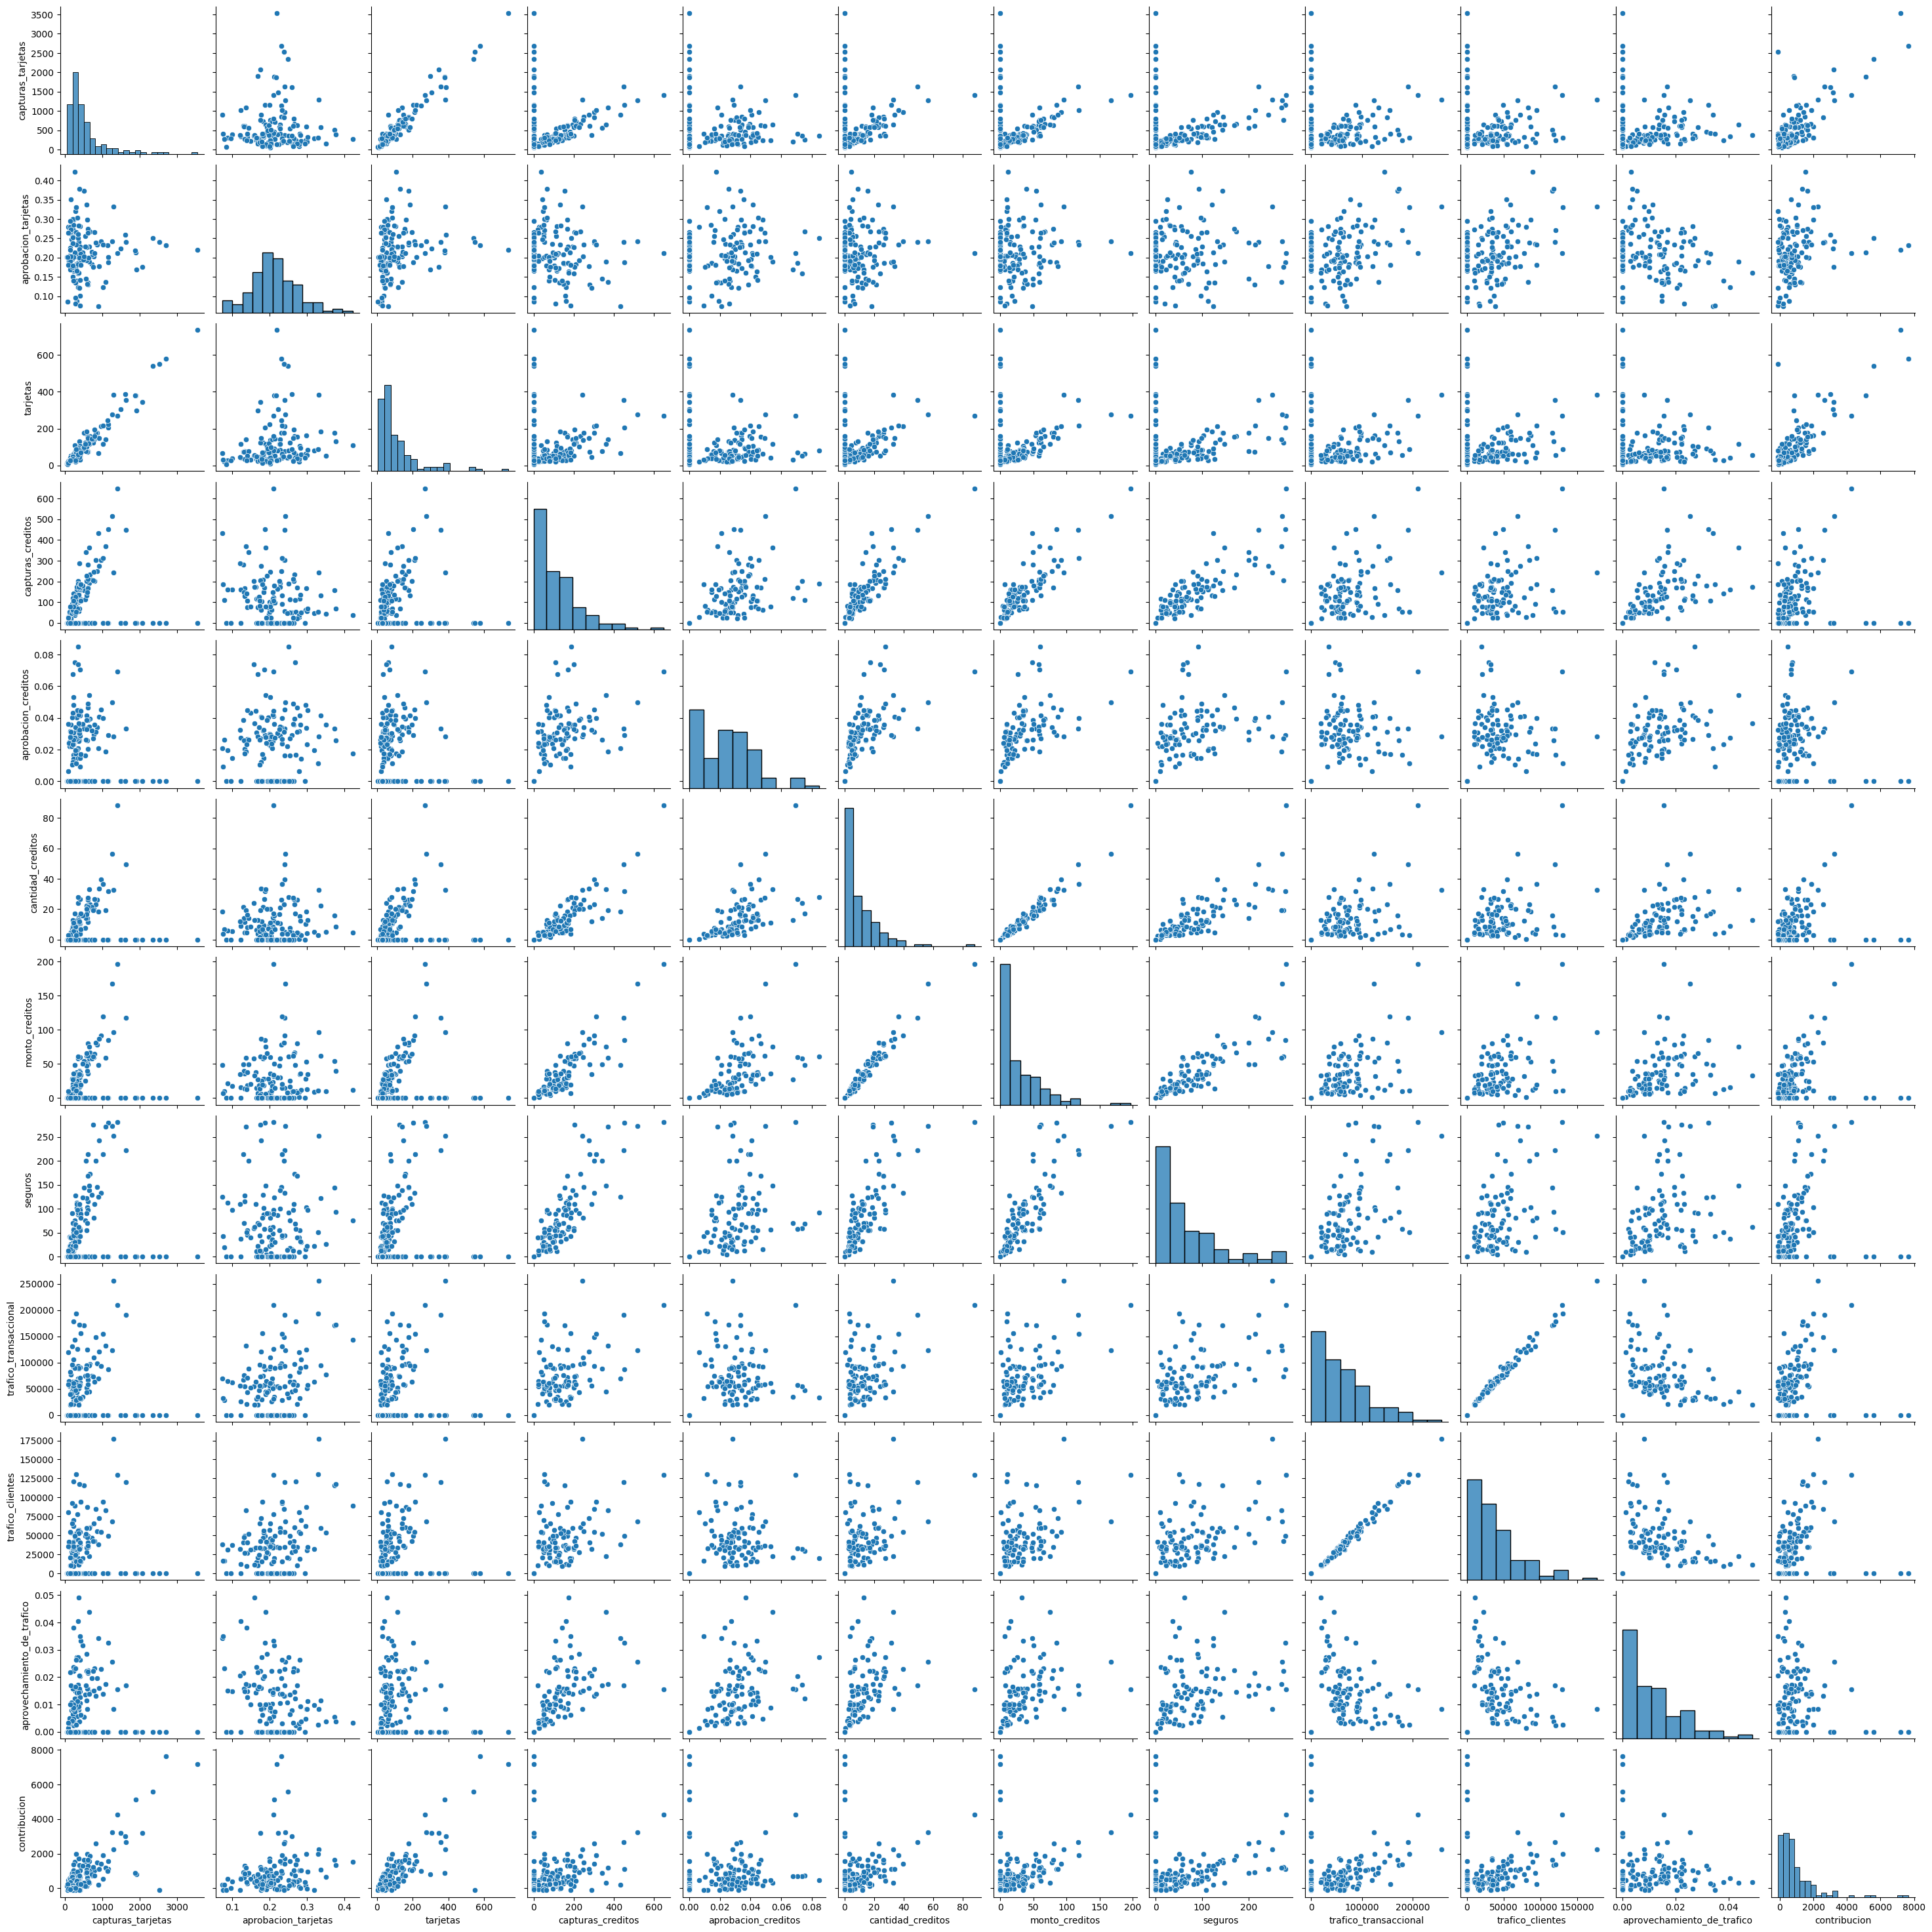

In [39]:
plt.figure(figsize=(15, 10))

sns.pairplot(df)

In [40]:
# para realizar el escalado de los datos con Robust Scale 

Numericas =['capturas_tarjetas', 'aprobacion_tarjetas', 'tarjetas', 'capturas_creditos','aprobacion_creditos', 'monto_creditos', 'seguros', 'trafico_transaccional', 'trafico_clientes', 'aprovechamiento_de_trafico', 'contribucion']
diccionario_Q = {}
x = df.describe()

for col in Numericas:
    if col in df.columns:
        diccionario_Q[col] = [x[col]['25%'], x[col]['75%'], x[col].median()]


In [41]:
# Visualización del diccionario 
diccionario_Q

{'capturas_tarjetas': [234.75, 642.5, 465.74541044826157],
 'aprobacion_tarjetas': [0.17916, 0.25032, 0.21129333333333333],
 'tarjetas': [41.75, 138.75, 116.03480578161158],
 'capturas_creditos': [0.0, 170.0, 117.23790924989501],
 'aprobacion_creditos': [0.0, 0.03578, 0.02482652482269504],
 'monto_creditos': [0.0, 39.60173, 30.770269392842987],
 'seguros': [0.0, 97.5, 68.5132251402508],
 'trafico_transaccional': [0.0, 89358.25, 54629.10479910512],
 'trafico_clientes': [0.0, 54000.25, 34161.0771908385],
 'aprovechamiento_de_trafico': [0.0, 0.0166, 0.010915718379609234],
 'contribucion': [240.1794, 1094.62115, 760.3065230496453]}

In [42]:
# Escalado o normalización de las columnas numéricas
def normalize (df, var,dic):
    df[var + '_norm'] = (df[var] - dic[var][2])/(dic[var][1]-dic[var][0])

# Aplicar normalización a las columnas seleccionadas
normalize(df, 'capturas_tarjetas',diccionario_Q)
normalize(df, 'aprobacion_tarjetas',diccionario_Q)
normalize(df, 'tarjetas',diccionario_Q)
normalize(df, 'capturas_creditos',diccionario_Q)
normalize(df, 'aprobacion_creditos',diccionario_Q)
normalize(df, 'monto_creditos',diccionario_Q)
normalize(df, 'seguros',diccionario_Q)
normalize(df, 'trafico_transaccional',diccionario_Q)
normalize(df, 'trafico_clientes',diccionario_Q)
normalize(df, 'aprovechamiento_de_trafico',diccionario_Q)
normalize(df, 'contribucion',diccionario_Q)

In [43]:
# Visualización columnas luego de la tranformación
df.columns

Index(['capturas_tarjetas', 'aprobacion_tarjetas', 'tarjetas',
       'capturas_creditos', 'aprobacion_creditos', 'cantidad_creditos',
       'monto_creditos', 'seguros', 'trafico_transaccional',
       'trafico_clientes', 'aprovechamiento_de_trafico', 'contribucion',
       'capturas_tarjetas_norm', 'aprobacion_tarjetas_norm', 'tarjetas_norm',
       'capturas_creditos_norm', 'aprobacion_creditos_norm',
       'monto_creditos_norm', 'seguros_norm', 'trafico_transaccional_norm',
       'trafico_clientes_norm', 'aprovechamiento_de_trafico_norm',
       'contribucion_norm'],
      dtype='object')

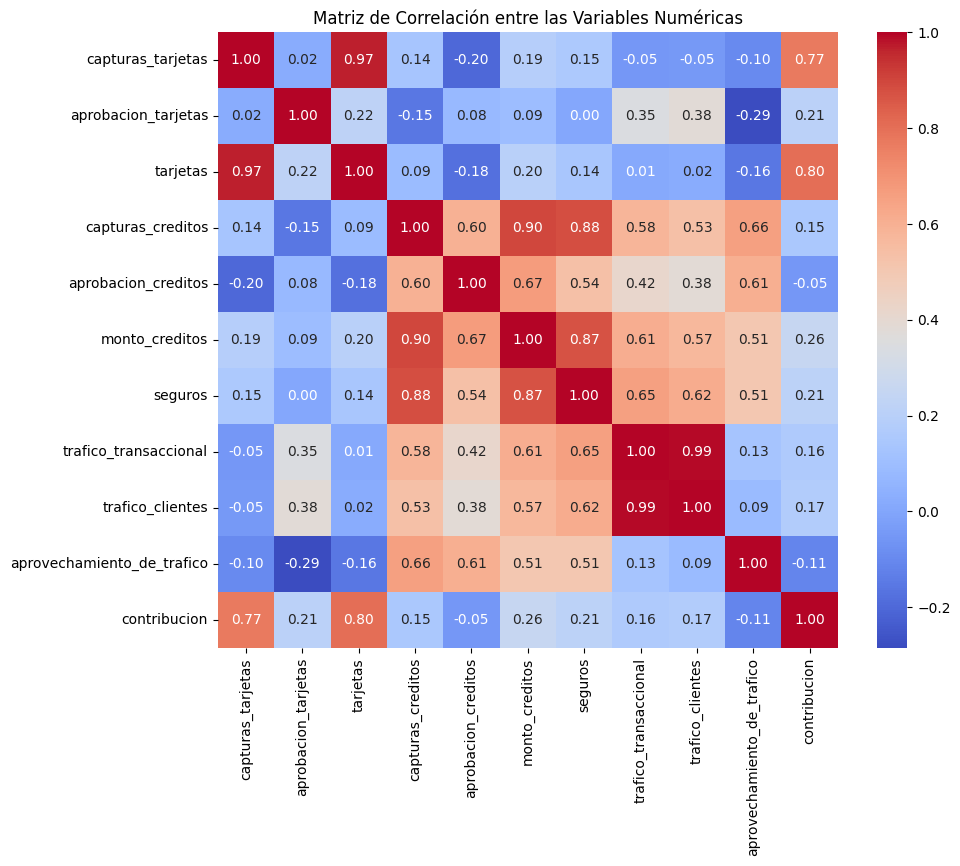

In [44]:
# Matriz de correlación para revisar relación entre las variables numéricas
plt.figure(figsize=(10, 8))
correlation_matrix = df[['capturas_tarjetas', 'aprobacion_tarjetas', 'tarjetas', 'capturas_creditos','aprobacion_creditos', 'monto_creditos',
                          'seguros', 'trafico_transaccional', 'trafico_clientes', 'aprovechamiento_de_trafico', 'contribucion']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre las Variables Numéricas')
plt.show()

In [45]:
# Lista final de variables seleccionadas (Se eliminan las de mayor correlación para evitar multicolinealidad)
X_scaled = df[['capturas_tarjetas_norm', 'aprobacion_tarjetas_norm',
       'aprobacion_creditos_norm',
       'monto_creditos_norm', 'trafico_transaccional_norm',
       'aprovechamiento_de_trafico_norm',
       'contribucion_norm']]

# **Modelos** Ⓜ️

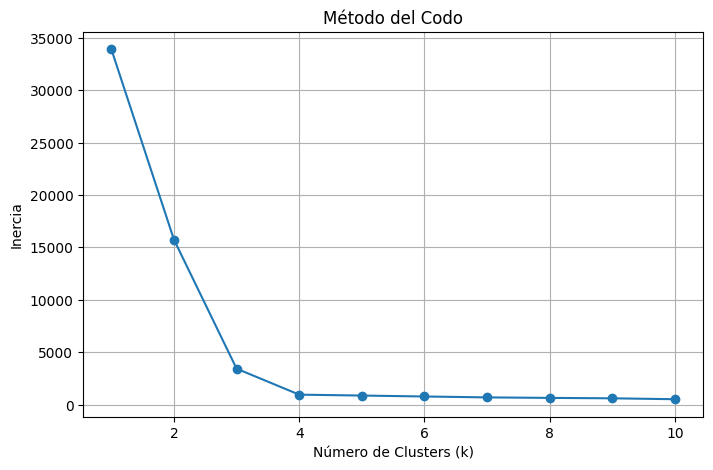

In [46]:
# Se generan los datos 
X_scaled, _ = make_blobs(n_samples=500, centers=4, n_features=2, random_state=42)

# Paso 3: Calcula la inercia para distintos valores de k
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Paso 4: Gráfico del método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.grid(True)
plt.show()


In [47]:
print(type(X_scaled))
print(X_scaled.shape)

<class 'numpy.ndarray'>
(500, 2)


In [48]:
X_scaled

array([[ -7.68905443,   6.62034649],
       [ -9.57651383,  -6.93440446],
       [  6.82968177,   1.1648714 ],
       [ -2.90130578,   7.55077118],
       [ -5.67841327,  -7.28818497],
       [ -6.04929137,  -7.73619342],
       [ -6.27824322,   7.22746302],
       [ -6.60917037,  -6.9303477 ],
       [  3.57225841,   1.8307902 ],
       [ -7.50444577,  -6.85401854],
       [  3.99330595,   0.89162168],
       [ -1.35060204,   8.19360381],
       [  6.77291221,   0.02108188],
       [ -1.93830711,  10.14985177],
       [ -6.58985233,  -4.80470879],
       [  5.69830332,   0.2144302 ],
       [ -2.58120774,  10.01781903],
       [ -9.96104978,   7.70593266],
       [ -8.75604377,   8.38900329],
       [ -3.6155326 ,   7.8180795 ],
       [  3.24131126,   2.53613892],
       [ -2.30033403,   7.054616  ],
       [  5.2164358 ,   2.28441984],
       [ -7.27280373,   7.25777265],
       [ -9.28476137,   7.51761291],
       [ -6.48517505,  -7.30109407],
       [ -7.13460441,  -5.3761166 ],
 

In [49]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# Se toman 4 cluster
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df)


df_clusters = pd.DataFrame(df, columns=['capturas_tarjetas_norm', 'aprobacion_tarjetas_norm',
       'aprobacion_creditos_norm',
       'monto_creditos_norm', 'trafico_transaccional_norm',
       'aprovechamiento_de_trafico_norm',
       'contribucion_norm'])

df_clusters['cluster'] = clusters

# Medias por cluster
resumen = df_clusters.groupby('cluster').mean()

# Tamaño de por grupo
conteo = df_clusters['cluster'].value_counts().sort_index()

# Resultados
print("Distribución de puntos de registros por cluster:")
print(conteo)
print("\nResumen de variables por cluster:")
print(resumen)


Distribución de puntos de registros por cluster:
cluster
0    31
1    49
2     8
3    53
Name: count, dtype: int64

Resumen de variables por cluster:
         capturas_tarjetas_norm  aprobacion_tarjetas_norm  \
cluster                                                     
0                      0.258392                  0.280185   
1                      0.691712                 -0.192447   
2                      0.726636                  1.362112   
3                     -0.248094                 -0.093111   

         aprobacion_creditos_norm  monto_creditos_norm  \
cluster                                                  
0                        0.140660             0.486933   
1                       -0.495049            -0.674795   
2                        0.108852             0.914180   
3                        0.282884             0.007148   

         trafico_transaccional_norm  aprovechamiento_de_trafico_norm  \
cluster                                                       

# **Revisión de resultados** 📈📉

In [50]:
# Agregar region al df

df_clusters['region'] = df_Original['region'] 
df_clusters['negocio'] = df_Original['negocio'] 
df_clusters['canal'] = df_Original['canal'] 

# conteo de puntos de venta por cluster y región
tabla = pd.crosstab(df_clusters['cluster'], df_clusters['region'])
tabla2 = pd.crosstab(df_clusters['cluster'], df_clusters['negocio'])
tabla3 = pd.crosstab(df_clusters['cluster'], df_clusters['canal'])

print(tabla)
print(tabla2)
print(tabla3)

region   ALKOSTO  ANTIOQUIA  BOGOTA 1  BOGOTA 2  COSTAS  EJE CAFETERO Y SUR  \
cluster                                                                       
0              0          5         4         6       6                   7   
1             37          0         0         3       2                   4   
2              0          4         4         0       0                   0   
3              0          6         9        10       9                  11   

region   SANTANDERES BOYACA  
cluster                      
0                         3  
1                         3  
2                         0  
3                         8  
negocio   A   E
cluster        
0         0  31
1        37  12
2         0   8
3         0  53
canal    305001    305002    305003    305004    305005    305006    305007    \
cluster                                                                         
0               1         1         0         0         0         1         0   
1     

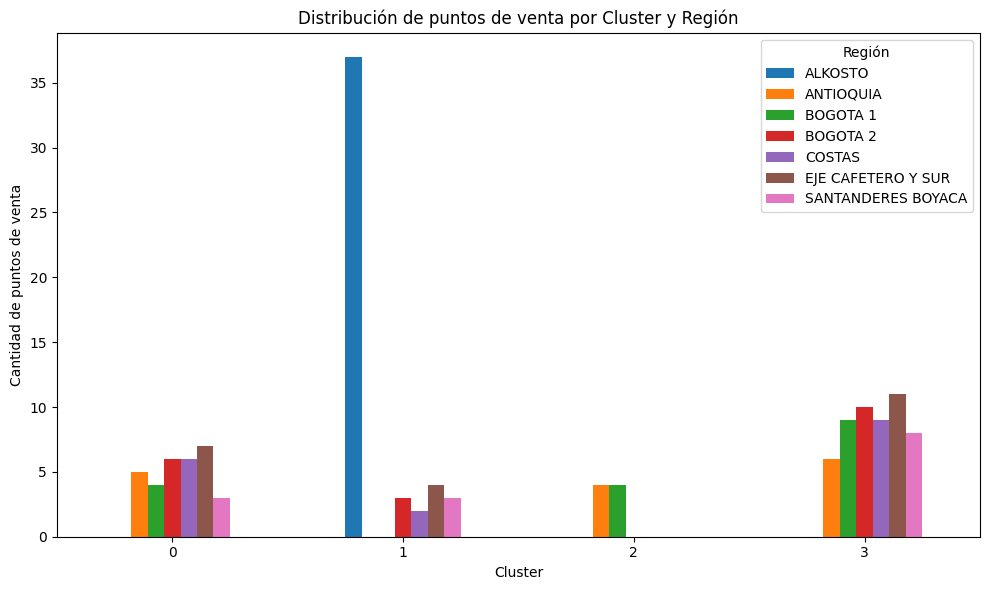

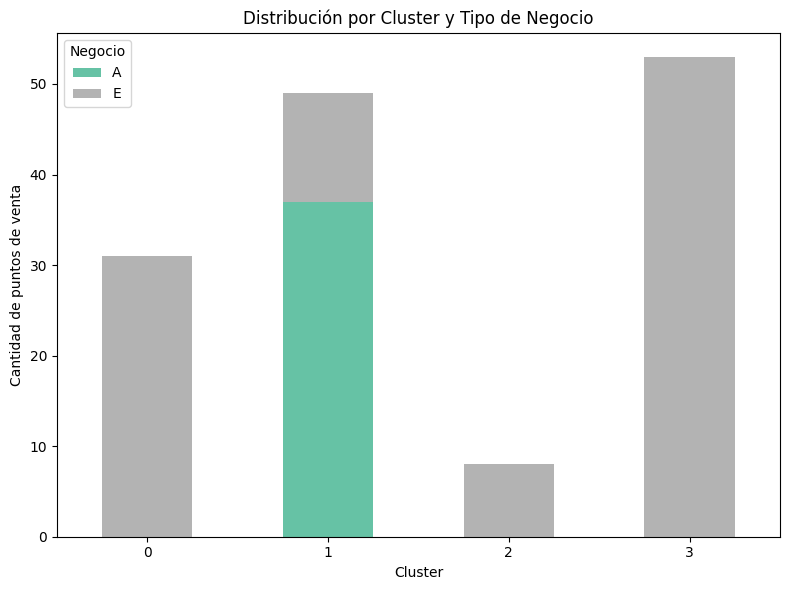

In [54]:
import matplotlib.pyplot as plt

tabla.plot(kind='bar', stacked=False, figsize=(10,6))
plt.title('Distribución de puntos de venta por Cluster y Región')
plt.xlabel('Cluster')
plt.ylabel('Cantidad de puntos de venta')
plt.legend(title='Región')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


tabla2.plot(kind='bar', stacked=True, figsize=(8,6), colormap='Set2')
plt.title('Distribución por Cluster y Tipo de Negocio')
plt.xlabel('Cluster')
plt.ylabel('Cantidad de puntos de venta')
plt.legend(title='Negocio')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


